In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

In [8]:
df = pd.read_csv("amz_uk_price_prediction_dataset.csv")

In [12]:
df = df[df.columns[df.isnull().mean() < 0.8]]


In [19]:
#PART1
#1cross tab analysis category and isbestsellr
crosstab_result = pd.crosstab(df['category'], df['isBestSeller'])

crosstab_result

isBestSeller,False,True
category,,
3D Printers,247,1
3D Printing & Scanning,4065,2
Abrasive & Finishing Products,245,5
Action Cameras,1696,1
Adapters,251,3
...,...,...
Wind Instruments,243,7
Window Treatments,234,5
Women,17559,213


In [25]:
crosstab_result.sort_values(by=True, ascending=False)

isBestSeller,False,True
category,,
Grocery,9008,556
Health & Personal Care,9017,552
Baby,14709,341
Sports & Outdoors,835935,330
Power & Hand Tools,8353,306
...,...,...
Downhill Ski Boots,1284,0
Digital Frames,774,0
Motorbike Chassis,107,0


In [29]:
#2statistical test, chi square
from scipy.stats import chi2_contingency

chi2_statistic, chi2_p_value, _, _ = chi2_contingency(crosstab_result)

chi2_statistic, chi2_p_value
#p value less than 0.5 therfor we reject null hypothesis, categories are not indipendent

(36540.20270061387, 0.0)

In [31]:
#cramerV test
from scipy.stats.contingency import association

# Computing the association between variables in 'crosstab_result' using the "cramer" method
association(crosstab_result, method="cramer")
#weak ascociation between categories


0.1222829439760564

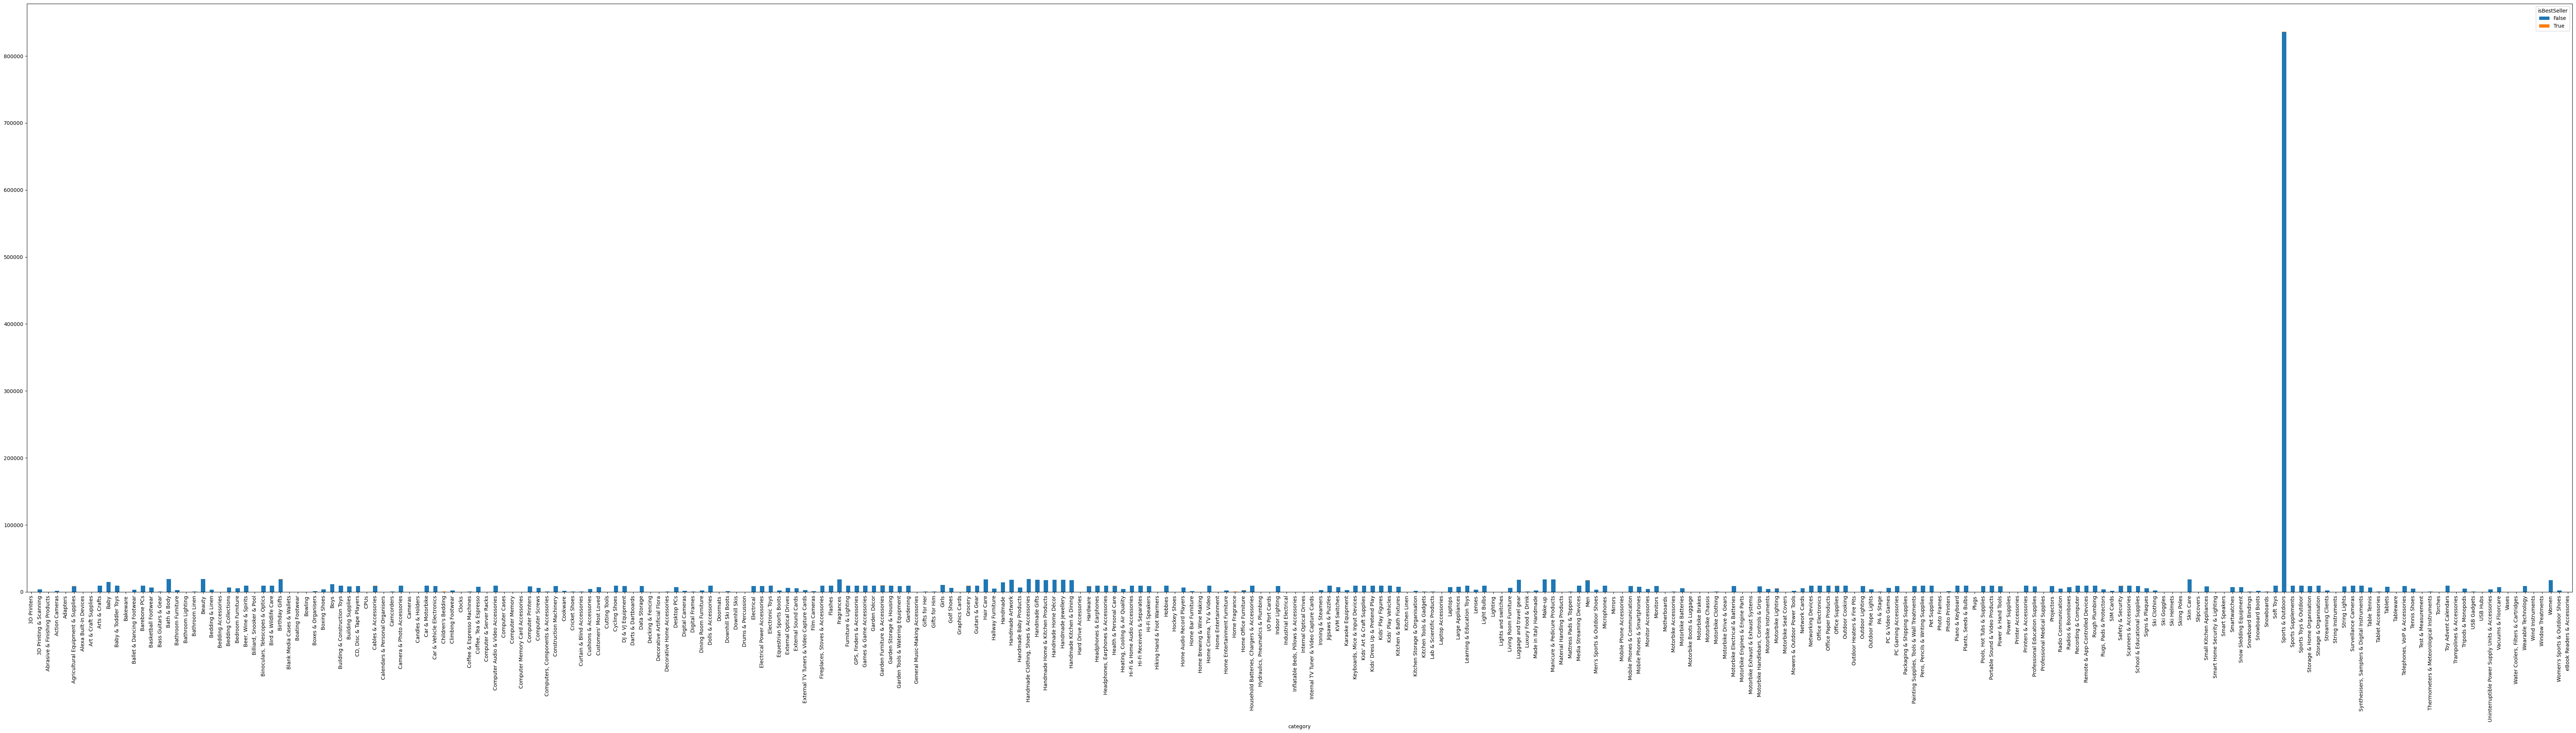

In [73]:
#visualisation
crosstab_result.plot(kind="bar", stacked=True, figsize = (70,20));
plt.tight_layout()


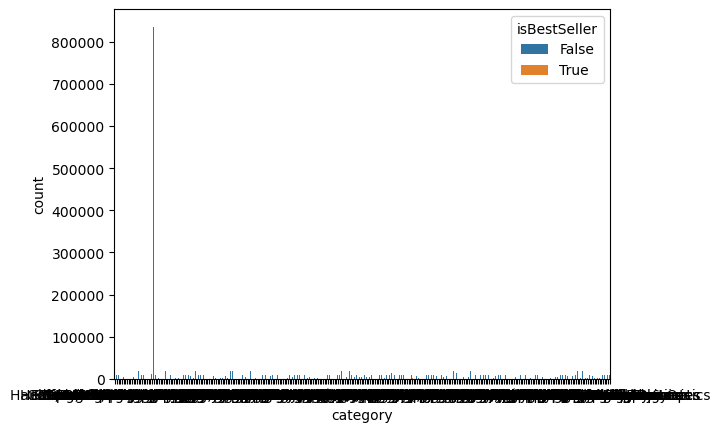

In [40]:
sns.countplot(data=df, x='category', hue='isBestSeller');

In [ ]:
#Part2
#0 outliner

In [78]:
df.columns


Index(['uid', 'asin', 'title', 'stars', 'reviews', 'price', 'isBestSeller',
       'boughtInLastMonth', 'category'],
      dtype='object')

In [80]:
#0
def tukeys_test_outliers(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1

    # Define bounds for the outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify the outliers
    outliers = data[(data < lower_bound) | (data > upper_bound)]

    return outliers

In [82]:
data_series = df['price']  # replace 'ColumnName' with your specific column
outliers = tukeys_test_outliers(data_series)
print(outliers)
df.iloc[~outliers.index,:] # ~ = NOT

10         139.00
19         164.99
25         149.99
28         289.00
31         199.99
            ...  
2443619    166.99
2443627    152.58
2443638    108.77
2443641    166.99
2443643    158.99
Name: price, Length: 327688, dtype: float64


,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
2443640,2828581,B0BX2KM9KQ,Motorcycle Socks 2 Pairs I'd Rather be on My M...,0.0,0,10.99,False,0,Motorbike Clothing
2443631,2828572,B01N1GW57Z,WULFSPORT LINEAR MOTORBIKE KIDS RACE SUIT New ...,5.0,4,60.62,False,0,Motorbike Clothing
2443625,2828566,B095K5HFZ7,SHIMA SX-2 EVO LADY Motorbike Shoes for Women ...,4.6,170,99.95,False,0,Motorbike Clothing
2443622,2828563,6040458925,starlingukpk Quality Flexible Motorbike Motorc...,4.2,2,9.99,False,0,Motorbike Clothing
2443619,2828560,B07JLZB7YY,Motorcycle Clothing Suit - Motorbike Suit With...,0.0,0,166.99,False,0,Motorbike Clothing
...,...,...,...,...,...,...,...,...,...
31,32,B08MQRDDYB,"Echo Show 15 | Full HD 15.6"" smart display wit...",4.4,2616,199.99,False,0,Hi-Fi Speakers
23,24,B09HGRXXTM,JBL Flip 6 Portable Bluetooth Speaker with 2-w...,4.7,8700,98.95,False,0,Hi-Fi Speakers
12,13,B09ZXDMNCY,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers
9,10,B09ZQF5GZW,RIENOK Bluetooth Speaker Portable Wireless Blu...,4.5,16014,29.99,False,0,Hi-Fi Speakers


In [84]:
Q3 = df['price'].quantile(0.75)
Q1 = df['price'].quantile(0.25)
IQR = Q3 - Q1
lower_wisker = Q1 - 1.5*IQR
upper_wisker = Q3 + 1.5*IQR
list(df.columns).index('price')
lower_outliers_indexes = df[ df['price'] <  lower_wisker].index
upper_outliers_indexes = df[ df['price'] >  upper_wisker].index
# Replace the value of the upper_outliers with the value of the upper wisker
# Replace the value of the lower_outliers with the value of the lower wisker
df.iloc[lower_outliers_indexes,list(df.columns).index('price')] = lower_wisker
df.iloc[upper_outliers_indexes,list(df.columns).index('price')] = upper_wisker

In [103]:
print(f"Number of outliers replaced: {len(lower_outliers_indexes) + len(upper_outliers_indexes)}")

Number of outliers replaced: 327688


In [94]:
lower_outliers_indexes,upper_outliers_indexes

(Index([], dtype='int64'),
 Index([     10,      19,      25,      28,      31,      33,      34,      35,
             36,      37,
        ...
        2443590, 2443591, 2443603, 2443613, 2443614, 2443619, 2443627, 2443638,
        2443641, 2443643],
       dtype='int64', length=327688))

In [92]:
df_no_outliers = df[(df['price'] >= lower_wisker) & (df['price'] <= upper_wisker)]
df_no_outliers

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers
...,...,...,...,...,...,...,...,...,...
2443646,2828589,B0CHSD7P2Q,"Motorbike Armour, Motorbike Clothing, Cycling ...",0.0,0,22.34,False,0,Motorbike Clothing
2443647,2828590,B0B7B8FNBQ,PROFIRST Waterproof Motorcycle 2 Piece Ladies ...,0.0,0,97.99,False,0,Motorbike Clothing
2443648,2828591,B0BD5FL5FB,Men’s Motorcycle Motorbike Biker Trousers Kevl...,0.0,0,52.99,False,0,Motorbike Clothing
2443649,2828592,B008OYLL4I,Texpeed Mens Motorcycle Motorbike Biker Trouse...,4.3,404,79.99,False,0,Motorbike Clothing


In [112]:
#top 20
top_20_categories = df['category'].value_counts().head(20).index
filtered_df = df[df['category'].isin(top_20_categories)]
top_20_categories

Index(['Sports & Outdoors', 'Beauty', 'Handmade Clothing, Shoes & Accessories',
       'Bath & Body', 'Birthday Gifts', 'Manicure & Pedicure Products',
       'Skin Care', 'Make-up', 'Hair Care', 'Fragrances', 'Handmade Gifts',
       'Handmade Home Décor', 'Luggage and travel gear', 'Handmade Jewellery',
       'Handmade Artwork', 'Women', 'Handmade Home & Kitchen Products',
       'Handmade Kitchen & Dining', 'Men', 'Baby'],
      dtype='object', name='category')

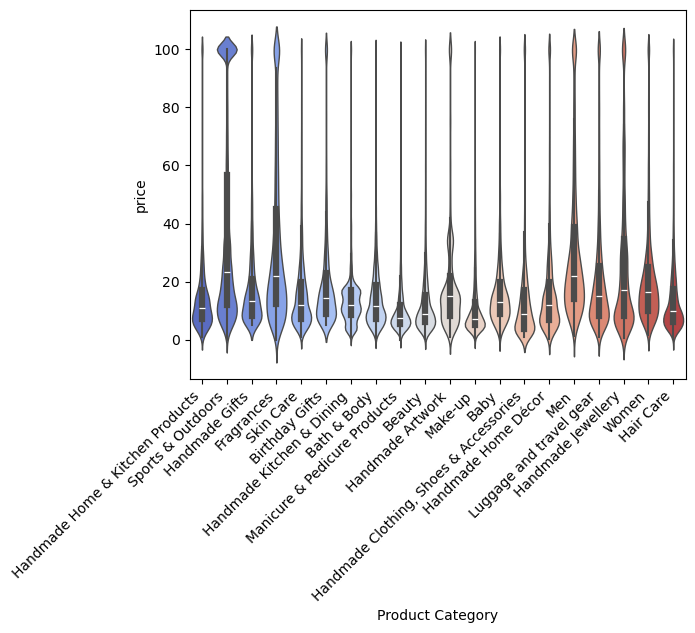

In [133]:
#violinplot
sns.violinplot(data=filtered_df, x='category', y='price', palette="coolwarm", hue='category', linewidth=1, legend=False);
plt.xlabel("Product Category", fontsize=10);
plt.xticks(rotation=45, ha='right');

In [147]:
#median
median_prices = df.groupby('category')['price'].median()
highest_median_price = median_prices.max()

median_prices,


(category
 3D Printers                       99.99
 3D Printing & Scanning            36.86
 Abrasive & Finishing Products     10.49
 Action Cameras                    60.77
 Adapters                           7.05
                                   ...  
 Wind Instruments                  99.99
 Window Treatments                 17.99
 Women                             16.49
 Women's Sports & Outdoor Shoes    61.64
 eBook Readers & Accessories       23.00
 Name: price, Length: 296, dtype: float64,)

In [149]:
highest_median_price

99.99000000000001

In [158]:
#2 bar chart vomparing avg price of top 10 products
top_10_categories = df_no_outliers['category'].value_counts().head(10).index
avg_price = df_no_outliers[df_no_outliers['category'].isin(top_10_categories)] \
    .groupby('category')['price'].mean().reset_index()

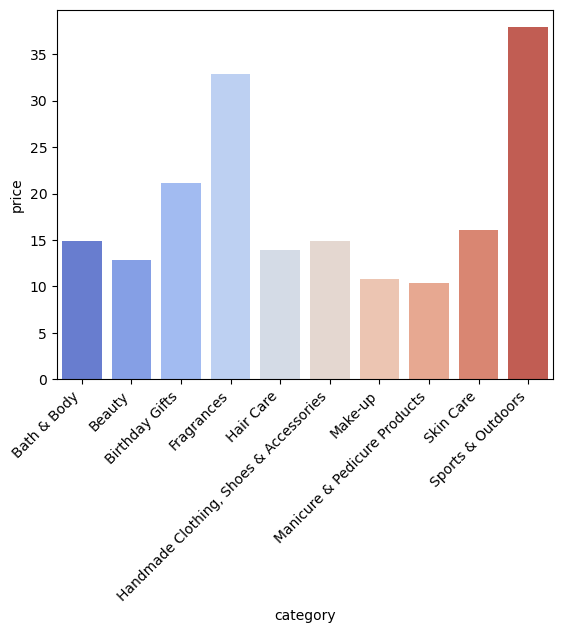

In [162]:
sns.barplot(data=avg_price, x='category', y='price', palette="coolwarm", hue='category', legend=False)
plt.xticks(rotation=45, ha='right');

In [172]:
#which product has the highest price
avg_price_all_categories = df_no_outliers.groupby('category')['price'].mean()
highest_avg_price = avg_price_all_categories.max()
avg_price_all_categories 

category
3D Printers                       93.566573
3D Printing & Scanning            48.506619
Abrasive & Finishing Products     15.454360
Action Cameras                    61.422557
Adapters                           8.750197
                                    ...    
Wind Instruments                  61.732200
Window Treatments                 20.541088
Women                             21.734194
Women's Sports & Outdoor Shoes    62.460541
eBook Readers & Accessories       36.833740
Name: price, Length: 296, dtype: float64

In [170]:
highest_avg_price

99.42996550772627

In [ ]:
#box plot
sns.boxplot(data=df, x='MSZoning', y='SalePrice', palette="coolwarm", hue='MSZoning', legend=False);

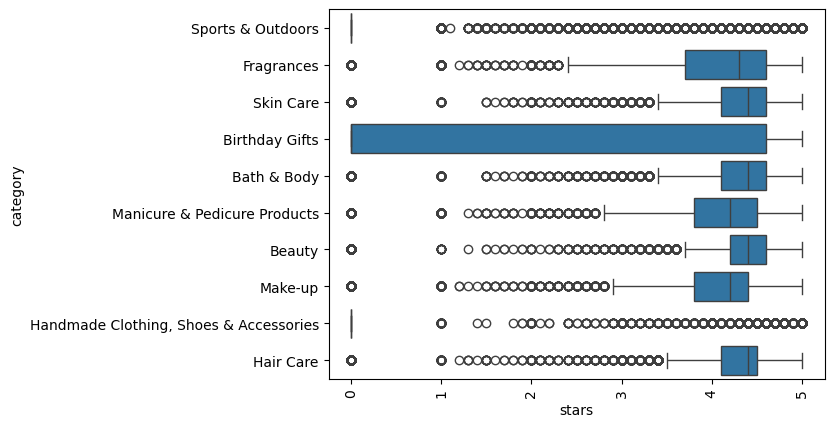

In [179]:
sns.boxplot(data=df[df['category'].isin(top_10_categories)], 
            x='stars', y='category');
plt.xticks(rotation=90);

In [ ]:
#median tends to show highest rating from customers Birthaday gifts

In [182]:
#3 corelation
pearson_correlation = df['price'].corr(df['stars'])
pearson_correlation
#Pearson correlation of -0.157 suggests a weak negative relationship between two variables

-0.15718340676827428

In [185]:
spearman_correlation = df['price'].corr(df['stars'], method='spearman')
spearman_correlation

-0.12968279503708532

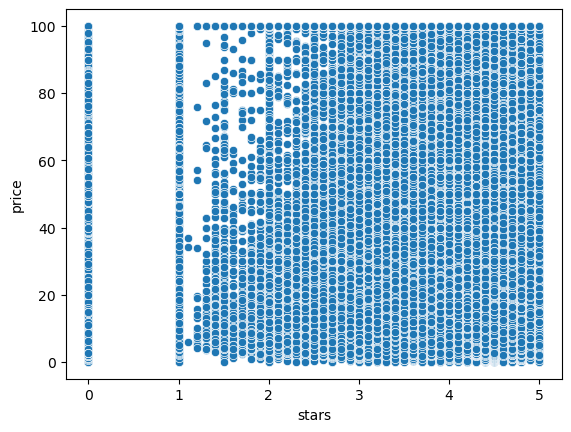

In [199]:
sns.scatterplot(data=df, x='stars', y='price');

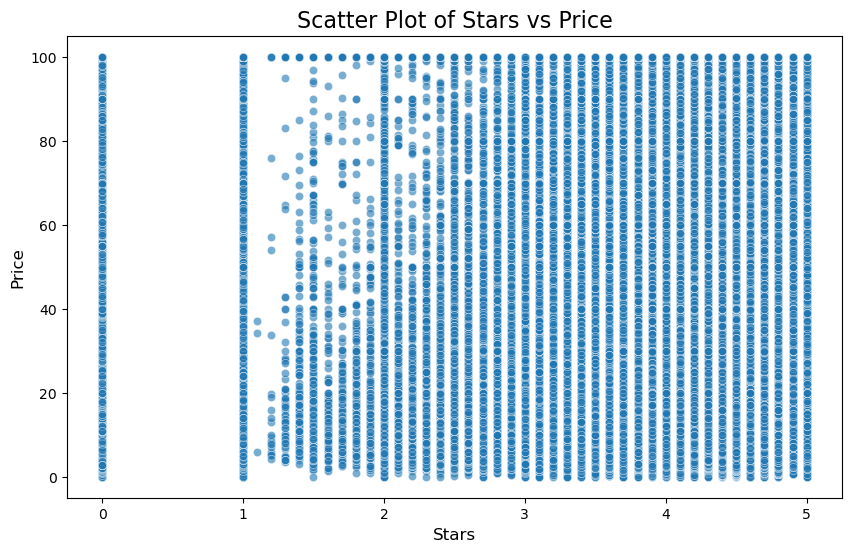

In [206]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='stars', y='price', alpha=0.6)  # alpha adds transparency
plt.title('Scatter Plot of Stars vs Price', fontsize=16)
plt.xlabel('Stars', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.show()

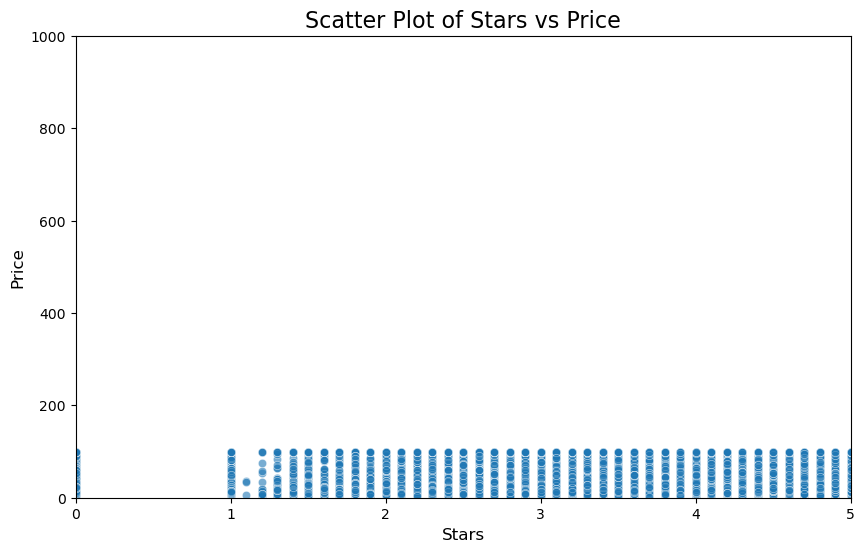

In [208]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='stars', y='price', alpha=0.6)
plt.xlim(0, 5)  # Limit stars to between 0 and 5
plt.ylim(0, 1000)  # Limit price to between 0 and 1000 (adjust based on your data)
plt.title('Scatter Plot of Stars vs Price', fontsize=16)
plt.xlabel('Stars', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.show()

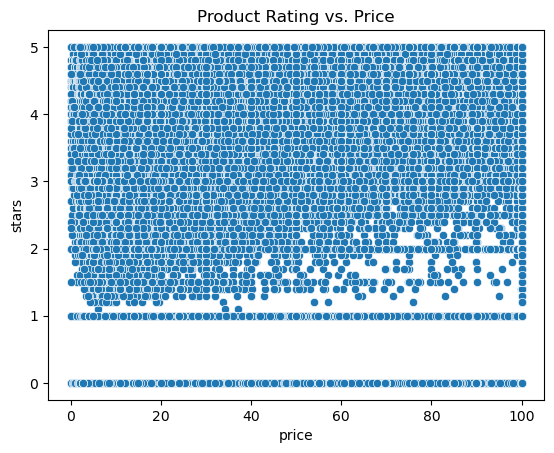

In [247]:
#scattrer plot outliers
sns.scatterplot(data=df_no_outliers, x='price', y='stars')
plt.title('Product Rating vs. Price')
plt.show()


In [226]:
#heatmap
numerical_df = df.select_dtypes(include=['number']) 

In [228]:
correlation_matrix = numerical_df.corr()

<Axes: >

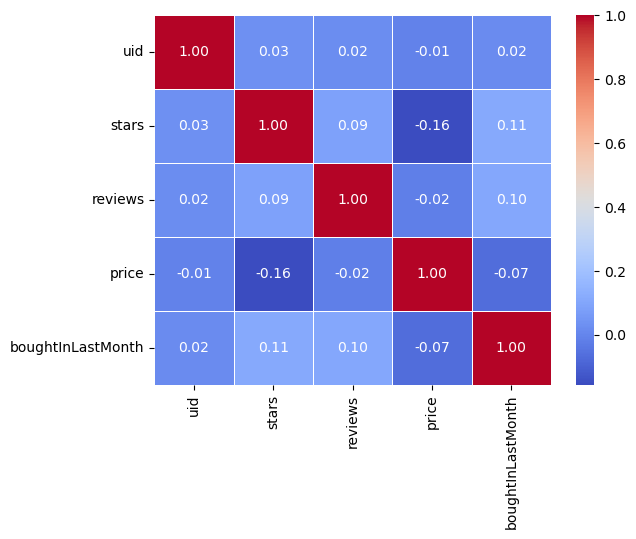

In [230]:
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5, cbar=True)

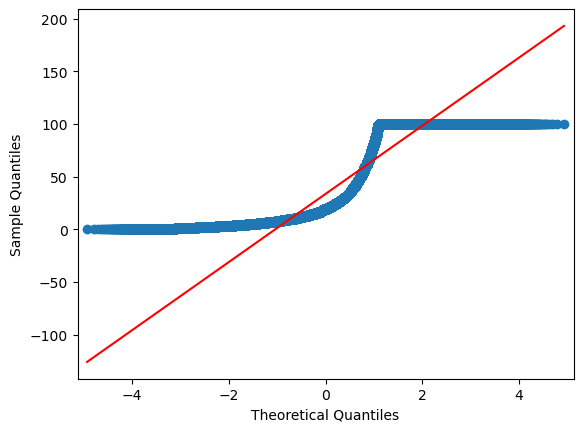

In [235]:
#qq plot
import statsmodels.api as sm

# Generating a Q-Q plot for 'Price' to check if its distribution follows a normal distribution
sm.qqplot(df['price'], line='s');

In [ ]:
#product prices are not perfectly normal due to the presence of outliers or a right-skewed distribution.

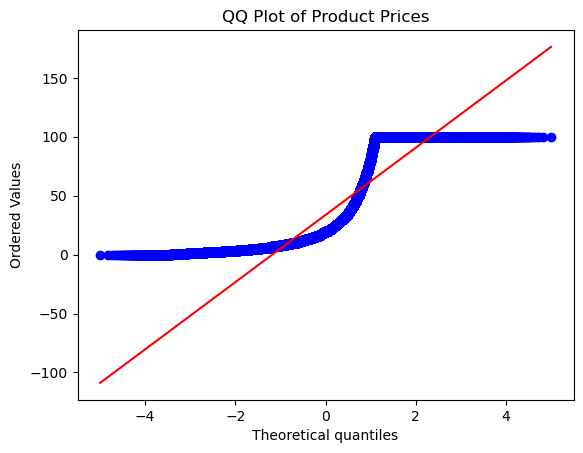

In [249]:
#qq plot outliers
import scipy.stats as stats

stats.probplot(df_no_outliers['price'], dist="norm", plot=plt)
plt.title('QQ Plot of Product Prices')
plt.show()


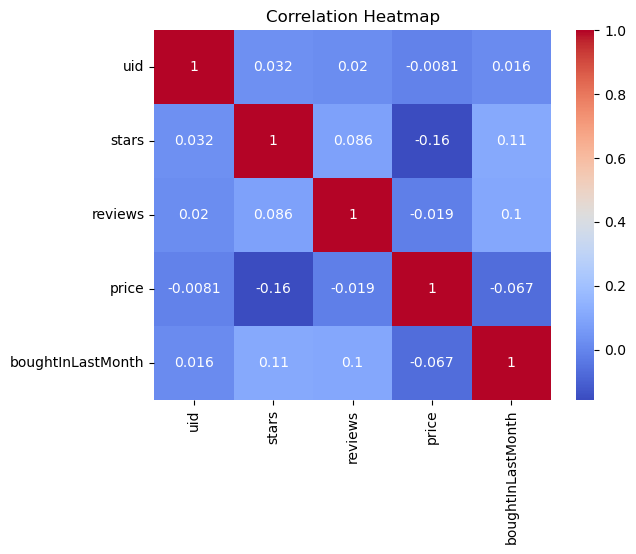

In [243]:
#with otliers heatmap
numerical_out_df = df_no_outliers.select_dtypes(include=['number']) 
correlation_matrix_out = numerical_out_df.corr()

sns.heatmap(correlation_matrix_out, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()